In [15]:
import pandas as pd
import numpy as np
import mplfinance as mpf
import talib
from talib import abstract

In [16]:
ticker = pd.read_csv(r"C:\Coding\10_VIP\data\2609.csv", index_col=0, parse_dates=True)

# ticker.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
ticker.columns = ['open', 'high', 'low', 'close', 'volume']
ticker = ticker.loc['2021-01':'2021-10', ]

print(ticker)

             open   high    low  close  volume
Date                                          
2021-01-04  30.70  32.15  30.70  32.15  102044
2021-01-05  31.60  32.00  30.00  32.00   49151
2021-01-06  32.00  32.00  28.80  28.80   64941
2021-01-07  28.60  28.60  25.95  25.95   49450
2021-01-08  25.65  27.40  25.65  27.30   79753
...           ...    ...    ...    ...     ...
2021-10-25  84.00  91.30  83.60  89.50  118776
2021-10-26  90.50  91.60  88.50  90.40   75382
2021-10-27  89.30  90.30  88.60  89.30   46820
2021-10-28  89.40  93.50  89.40  90.60   85763
2021-10-29  92.00  98.30  91.50  96.50  149098

[200 rows x 5 columns]


In [17]:
# 確認價量資料表 df 的值都是 float 格式
df = ticker.astype('float')

# 準備一份你想要計算並且併入 df 的技術指標清單
ta_list = ['MACD','RSI']
# 這裡示範全部 158 種技術指標
ta_list = talib.get_functions()

# 迴圈執行，看看結果吧！
for x in ta_list:
    try:
        # x 為技術指標的代碼，透過迴圈填入，再透過 eval 計算出 output
        output = eval('abstract.'+x+'(df)')
        # 如果輸出是一維資料，幫這個指標取名為 x 本身；多維資料則不需命名
        output.name = x.lower() if type(output) == pd.core.series.Series else None
        # 透過 merge 把輸出結果併入 df DataFrame
        df = pd.merge(df, pd.DataFrame(output), left_on = df.index, right_on = output.index)
        df = df.set_index('key_0')
    except:
        print(x)

MAVP


In [18]:
print(df)

             open   high    low  close    volume  ht_dcperiod  ht_dcphase  \
key_0                                                                       
2021-01-04  30.70  32.15  30.70  32.15  102044.0          NaN         NaN   
2021-01-05  31.60  32.00  30.00  32.00   49151.0          NaN         NaN   
2021-01-06  32.00  32.00  28.80  28.80   64941.0          NaN         NaN   
2021-01-07  28.60  28.60  25.95  25.95   49450.0          NaN         NaN   
2021-01-08  25.65  27.40  25.65  27.30   79753.0          NaN         NaN   
...           ...    ...    ...    ...       ...          ...         ...   
2021-10-25  84.00  91.30  83.60  89.50  118776.0    21.485989   31.275575   
2021-10-26  90.50  91.60  88.50  90.40   75382.0    22.441860   33.195870   
2021-10-27  89.30  90.30  88.60  89.30   46820.0    23.343397   35.198314   
2021-10-28  89.40  93.50  89.40  90.60   85763.0    24.094391   37.462934   
2021-10-29  92.00  98.30  91.50  96.50  149098.0    24.847585   40.354303   

In [20]:
df_macd = abstract.MACD(ticker)
print(df_macd)

                macd  macdsignal  macdhist
Date                                      
2021-01-04       NaN         NaN       NaN
2021-01-05       NaN         NaN       NaN
2021-01-06       NaN         NaN       NaN
2021-01-07       NaN         NaN       NaN
2021-01-08       NaN         NaN       NaN
...              ...         ...       ...
2021-10-25 -8.795321   -8.948675  0.153354
2021-10-26 -8.272188   -8.813378  0.541190
2021-10-27 -7.855805   -8.621863  0.766058
2021-10-28 -7.336350   -8.364760  1.028410
2021-10-29 -6.375110   -7.966830  1.591721

[200 rows x 3 columns]


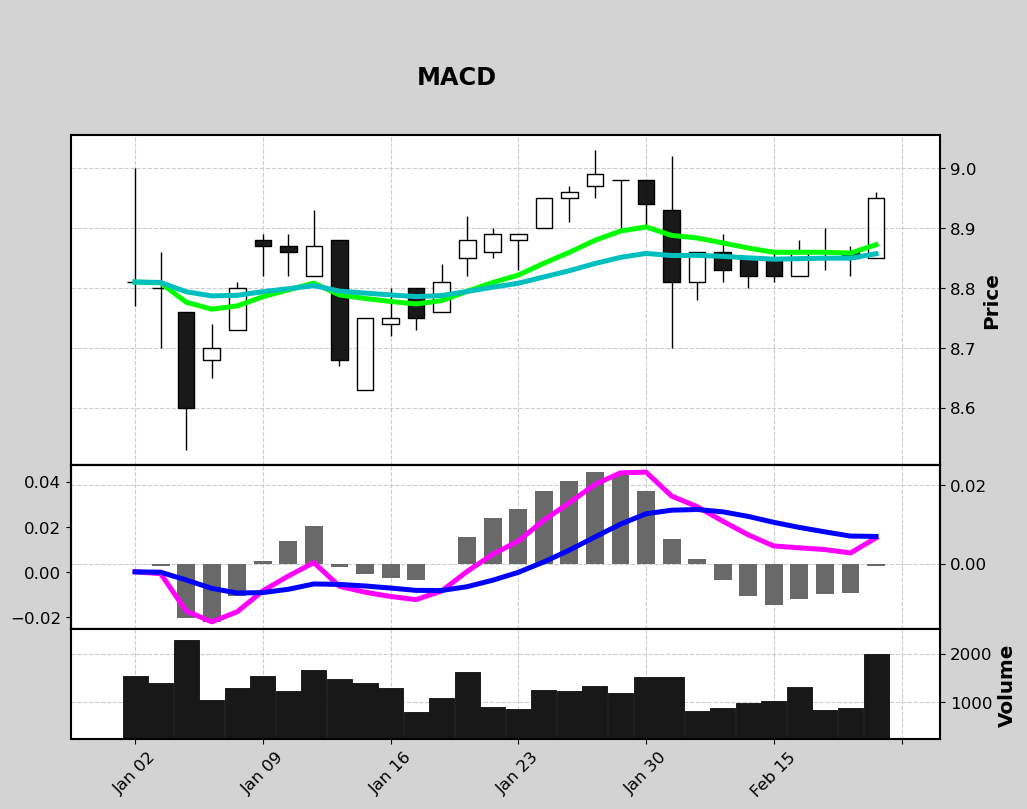

In [23]:
'''
This file contains a animation demo using mplfinance "external axes mode",
in which animate both the display of candlesticks as well as the display
of MACD (Moving Average Convergence Divergence) visual analysis.
In this example, instead of creating the Figure and Axes external to mplfiance,
we allow mplfinance to create the Figure and Axes using its "panel method", and
set kwarg `returnfig=True` so that mplfinance will return the Figure and Axes.
We then take those Axes and pass them back into mplfinance ("external axes mode")
as part of the animation.
Note that presently mplfinance does not support "blitting" (blitting makes animation
more efficient).  Nonetheless, the animation is efficient enough to update at least
once per second, and typically more frequently depending on the size of the plot.
'''
import pandas as pd
import mplfinance as mpf
import matplotlib.animation as animation

mpf.__version__

idf = pd.read_csv(r"C:\Coding\10_VIP\data\2609.csv",index_col=0,parse_dates=True)
idf.shape
idf.head(3)
idf.tail(3)
# df = idf.loc['2011-07-01':'2011-12-30',:]
df = idf

# =======
#  MACD:

df = df.iloc[0:30]

exp12     = df['Close'].ewm(span=12, adjust=False).mean()
exp26     = df['Close'].ewm(span=26, adjust=False).mean()
macd      = exp12 - exp26
signal    = macd.ewm(span=9, adjust=False).mean()
histogram = macd - signal

apds = [mpf.make_addplot(exp12,color='lime'),
        mpf.make_addplot(exp26,color='c'),
        mpf.make_addplot(histogram,type='bar',width=0.7,panel=1,
                         color='dimgray',alpha=1,secondary_y=False),
        mpf.make_addplot(macd,panel=1,color='fuchsia',secondary_y=True),
        mpf.make_addplot(signal,panel=1,color='b',secondary_y=True),
       ]

s = mpf.make_mpf_style(base_mpf_style='classic',rc={'figure.facecolor':'lightgray'})

fig, axes = mpf.plot(df,type='candle',addplot=apds,figscale=1.5,figratio=(7,5),title='\n\nMACD',
                     style=s,volume=True,volume_panel=2,panel_ratios=(6,3,2),returnfig=True)

ax_main = axes[0]
ax_emav = ax_main
ax_hisg = axes[2]
ax_macd = axes[3]
ax_sign = ax_macd
ax_volu = axes[4]

df =  idf.loc['2011-07-01':'2011-12-30',:]

def animate(ival):
    if (20+ival) > len(df):
        print('no more data to plot')
        ani.event_source.interval *= 3
        if ani.event_source.interval > 12000:
            exit()
        return
    data = df.iloc[0:(30+ival)]
    exp12     = data['Close'].ewm(span=12, adjust=False).mean()
    exp26     = data['Close'].ewm(span=26, adjust=False).mean()
    macd      = exp12 - exp26
    signal    = macd.ewm(span=9, adjust=False).mean()
    histogram = macd - signal
    apds = [mpf.make_addplot(exp12,color='lime',ax=ax_emav),
            mpf.make_addplot(exp26,color='c',ax=ax_emav),
            mpf.make_addplot(histogram,type='bar',width=0.7,
                             color='dimgray',alpha=1,ax=ax_hisg),
            mpf.make_addplot(macd,color='fuchsia',ax=ax_macd),
            mpf.make_addplot(signal,color='b',ax=ax_sign),
           ]

    for ax in axes:
        ax.clear()
    mpf.plot(data,type='candle',addplot=apds,ax=ax_main,volume=ax_volu)

ani = animation.FuncAnimation(fig,animate,interval=100)

mpf.show()

In [27]:
s = 'C:\Coding\\10_VIP\data\{}.csv'.format(2021)
print(s)

C:\Coding\10_VIP\data\2021.csv


In [36]:
k = 0
n = 4
for i1 in range(1, n+1):
    for i2 in range(1, i1+1):
        for i3 in range(1, i2+1):
            for i4 in range(1, i3+1):
                print(i1)
                print(i2)
                print(i3)
                print(i4)
                print()
                k += 1
print()
print(k)

1
1
1
1

2
1
1
1

2
2
1
1

2
2
2
1

2
2
2
2

3
1
1
1

3
2
1
1

3
2
2
1

3
2
2
2

3
3
1
1

3
3
2
1

3
3
2
2

3
3
3
1

3
3
3
2

3
3
3
3


15
